# **Importing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

# **Data Preprocessing**

In [ ]:
df = pd.read_csv('/content/ipl_data.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
df.shape

(76014, 15)

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

## **Data Visualization**

In [ ]:
matches_per_venue = df[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

In [ ]:
matches_per_venue

,mid,venue
0,1,M Chinnaswamy Stadium
124,2,"Punjab Cricket Association Stadium, Mohali"
248,3,Feroz Shah Kotla
370,4,Wankhede Stadium
493,5,Eden Gardens
...,...,...
75423,613,Maharashtra Cricket Association Stadium
75521,614,Feroz Shah Kotla
75648,615,Wankhede Stadium
75773,616,M Chinnaswamy Stadium


In [ ]:
matches_count.head()

,count
venue,
M Chinnaswamy Stadium,61
Eden Gardens,58
Feroz Shah Kotla,57
Wankhede Stadium,57
"MA Chidambaram Stadium, Chepauk",48


/tmp/ipython-input-8-1093868706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = matches_count.values, y = matches_count.index, palette='rainbow')


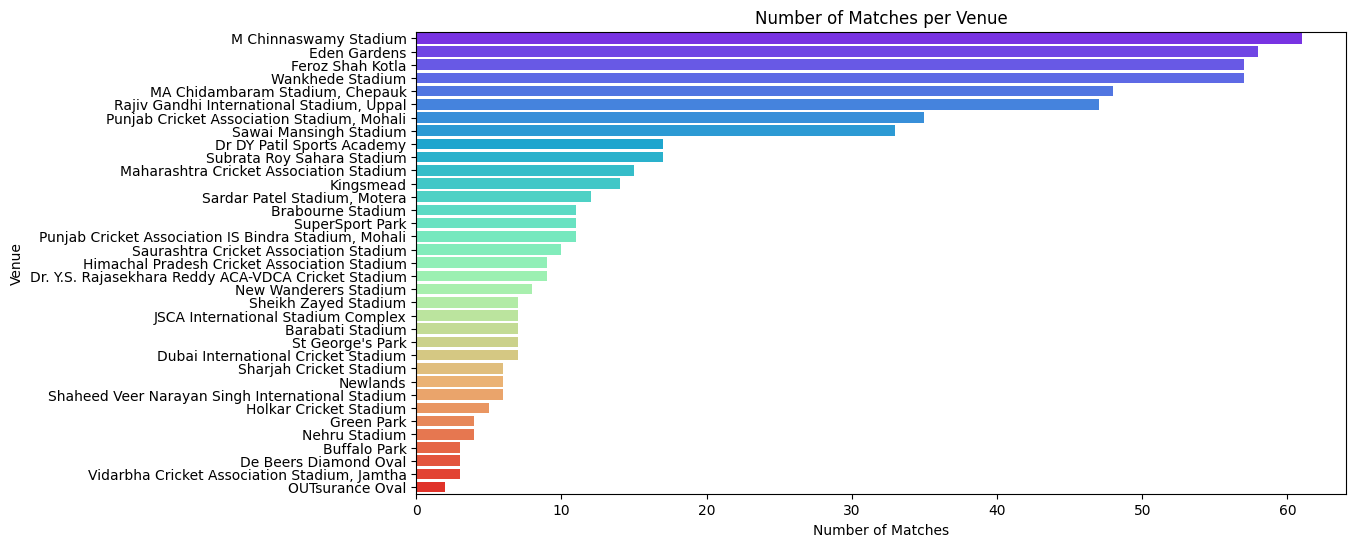

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = matches_count.values, y = matches_count.index, palette='rainbow')
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show();

In [ ]:
runs_by_batsman = df.groupby('batsman')['runs'].max().sort_values(ascending = False).head(10)
runs_by_batsman

,runs
batsman,
R Rampaul,263
CH Gayle,263
SS Tiwary,262
AB de Villiers,251
SR Watson,248
V Kohli,248
S Badrinath,246
MS Dhoni,241
M Vijay,241


/tmp/ipython-input-10-169100291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")


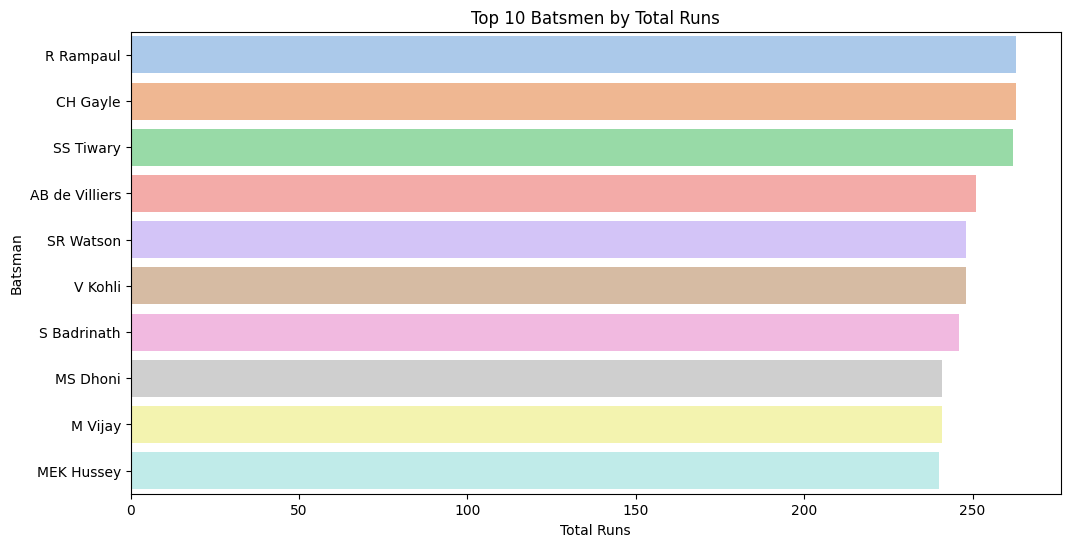

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

In [ ]:
wickets_by_bowler = df.groupby('bowler')['wickets'].max().sort_values(ascending = False).head(10)
wickets_by_bowler

,wickets
bowler,
A Kumble,10
B Lee,10
B Kumar,10
CJ Jordan,10
DR Smith,10
DS Kulkarni,10
D Wiese,10
DW Steyn,10
DJ Bravo,10


/tmp/ipython-input-12-1678509254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")


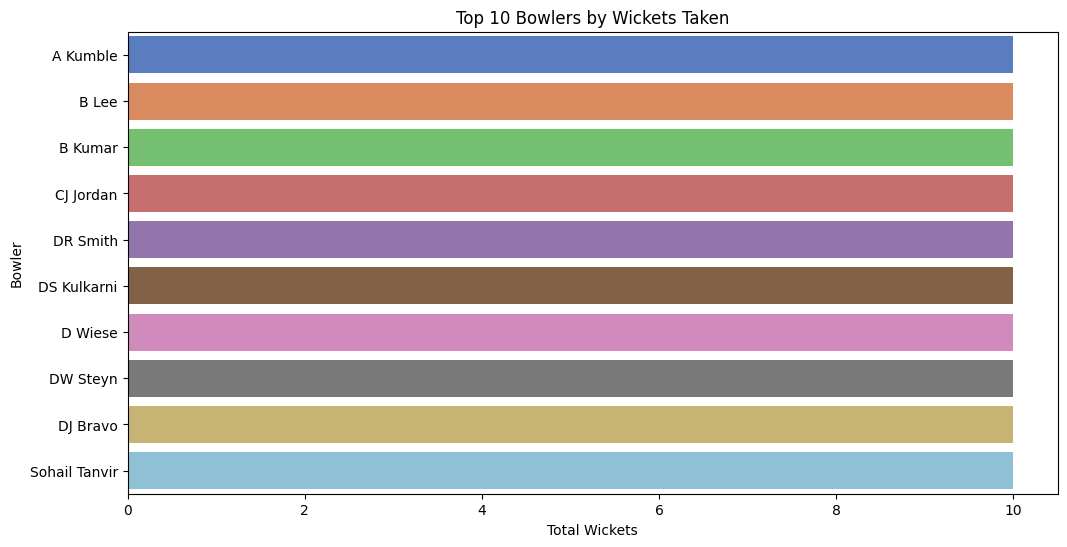

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

## **Label Encoding**

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
label_encoders

{'venue': LabelEncoder(),
 'bat_team': LabelEncoder(),
 'bowl_team': LabelEncoder(),
 'batsman': LabelEncoder(),
 'bowler': LabelEncoder()}

In [ ]:
label_encoders['venue'].classes_

array(['Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park',
       'De Beers Diamond Oval', 'Dr DY Patil Sports Academy',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Green Park',
       'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'M Chinnaswamy Stadium',
       'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium', 'Nehru Stadium',
       'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sardar Patel Stadium, Motera',
       'Saurashtra Cricket Association Stadium', 'Sawai Mansingh Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sharjah Cricket S

## **Feature Selection**

In [ ]:
df.drop(columns=['mid', 'date'], inplace=True)
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,14,6,12,328,201,1,0,0.1,1,0,0,0,222
1,14,6,12,61,201,1,0,0.2,1,0,0,0,222
2,14,6,12,61,201,2,0,0.2,2,0,0,0,222
3,14,6,12,61,201,2,0,0.3,2,0,0,0,222
4,14,6,12,61,201,2,0,0.4,2,0,0,0,222


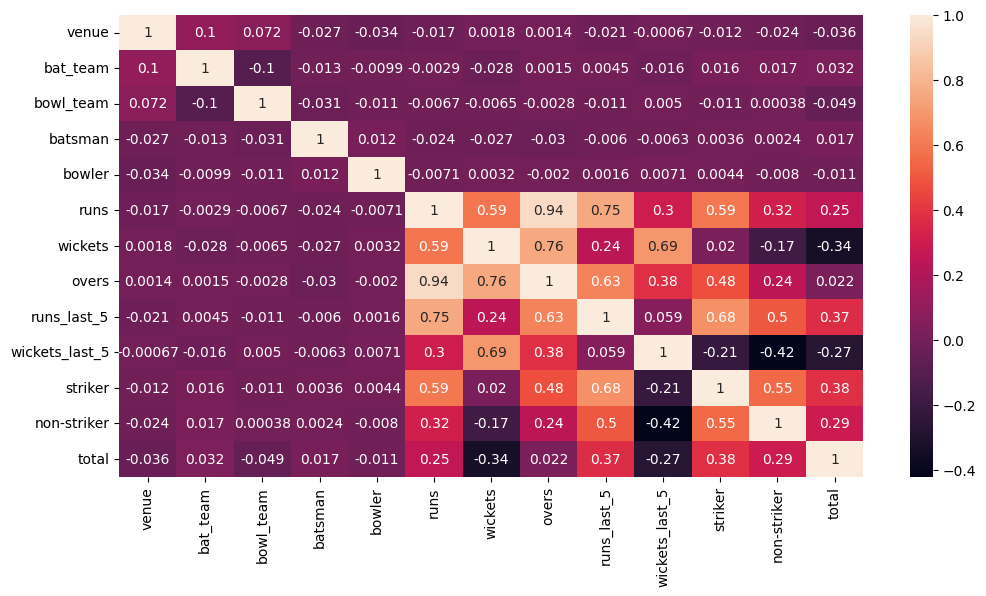

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Splitting the dataset**

In [ ]:
df.columns

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
feature_cols = ['venue', 'bat_team', 'bowl_team', 'batsman',
                'bowler', 'runs', 'wickets', 'overs', 'striker']

X = df[feature_cols]
y = df['total']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Scaling the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Buliding the model**

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

huber = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber,)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
)

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 52.2129 - val_loss: 14.7353
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 15.0246 - val_loss: 14.4911
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.7951 - val_loss: 14.4794
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14.6421 - val_loss: 14.7628
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 14.4670 - val_loss: 14.6452
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 14.3977 - val_loss: 14.0100
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 14.3232 - val_loss: 14.0197
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.1895 - val_loss: 13.7227
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14.1405 - val_loss: 14.3282
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.0264 - val_loss: 13.6198


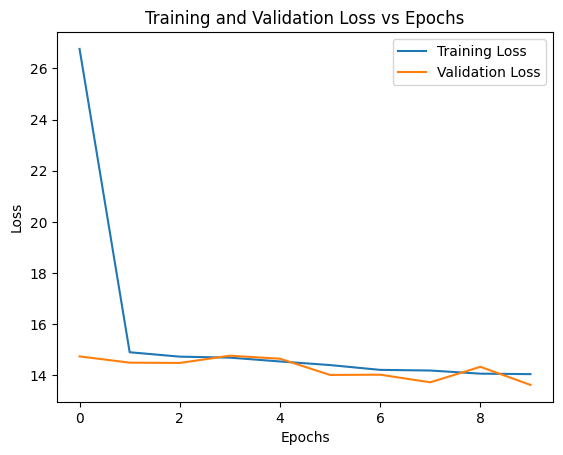

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.show()

# **Evaluating the model**

In [ ]:
predictions = model.predict(X_test)
predictions

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[132.34035],
       [184.05757],
       [140.54608],
       ...,
       [134.14964],
       [153.42735],
       [172.66591]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 382.4081115722656
Mean Absolute Error: 14.109869956970215
R-squared: 0.5465787053108215


# **Saving the model**

In [ ]:
model.save("best_model.keras")

In [ ]:
import pickle

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)